# Final Project Submission, Module 1

* Student name:     **Gina Durante**
* Student pace:     **full time**
* Scheduled project review date/time: 
* Instructor name:  **Brandon Lewis**
* Blog post URL:    https://gdurante2019.github.io  (will be posted once analysis is at least mostly complete)


## Notes to Self

### Deliverables
  -  A well documented Jupyter Notebook containing any code you've written for this project and comments explaining it.
  -  A short Keynote/PowerPoint/Google Slides presentation (delivered as a PDF export) giving a high-level overview of your methodology and recommendations for non-technical stakeholders.
  -  A blog post (800-1500 words) about one element of the project - it could be the EDA, the feature selection, the choice of visualizations or anything else technical relating to the project. It should be targeted at your peers - aspiring data scientists.

### The Dataset

For this project, you'll be working with the King County House Sales dataset. We've modified the dataset to make it a bit more fun and challenging. The dataset can be found in the file "kc_house_data.csv", in this repo.

The description of the column names can be found in the column_names.md file in this repository. As with most real world data sets, the coliumn names are not perfectly described, so you'll have to do some research or use your best judgement if you have questions relating to what the data means.

You'll clean, explore, and model this dataset with a multivariate linear regression to predict the sale price of houses as accurately as possible. 

### Data Science Process 

From the project description:  "Your notebook should contain 1 - 2 paragraphs briefly explaining your approach to this project through the OSEMN framework."  OSEMiN stands for Obtain, Scrub, Explore, Manipulate, and Interpret.

  -  I have been following this process, and have basically gotten through the first three (Obtain, Scrub, and part of Explore).  
  -  At the end of this notebook, I summarize the next steps for this project, which will take me through Explore, Manipulate, and Interpret.

## Obtain:  Import the data set and get an initial view of the column names and data types

In [360]:
# File to import:  "kc_house_data.csv"

import pandas as pd
import numpy as np
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Looking at some basic statistics:

In [361]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Let's find out some basic information about this data set:

In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [363]:
# import libraries for later
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

## Scrub: 
  -  Identifying and dealing with null values appropriately
  -  Casting columns to the appropriate data types  (May not complete this task, except for sqft_basement, due to time constraints)
  -  Removing columns that aren't required for modeling
  -  Checking for and dealing with multicollinearity
  -  Normalizing the data

In [364]:
# dropping id column:

df = df.drop('id', axis = 1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


#### Looking for null values:


In [365]:
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### Dealing with null values:
  -  for waterfront, set to 0, since most properties are not waterfront properties
  -  for view, set to most common value, 0
  -  for year renovated, set to value signifying that home has not been renovated (0)

In [366]:
df['waterfront'].fillna(0, inplace=True)
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [367]:
df['view'].fillna(0, inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [368]:
df['yr_renovated'].fillna(0, inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [369]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Changing sqft_basement from string to float:

In [370]:
df.sqft_basement = df.sqft_basement.replace("?", "0")
df.sqft_basement.head()

0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
Name: sqft_basement, dtype: object

In [371]:
df.sqft_basement = df.sqft_basement.astype(float)
df.sqft_basement.value_counts().head()

0.0      13280
600.0      217
500.0      209
700.0      208
800.0      201
Name: sqft_basement, dtype: int64

#### Checking histograms to get a sense of data types and relationships:

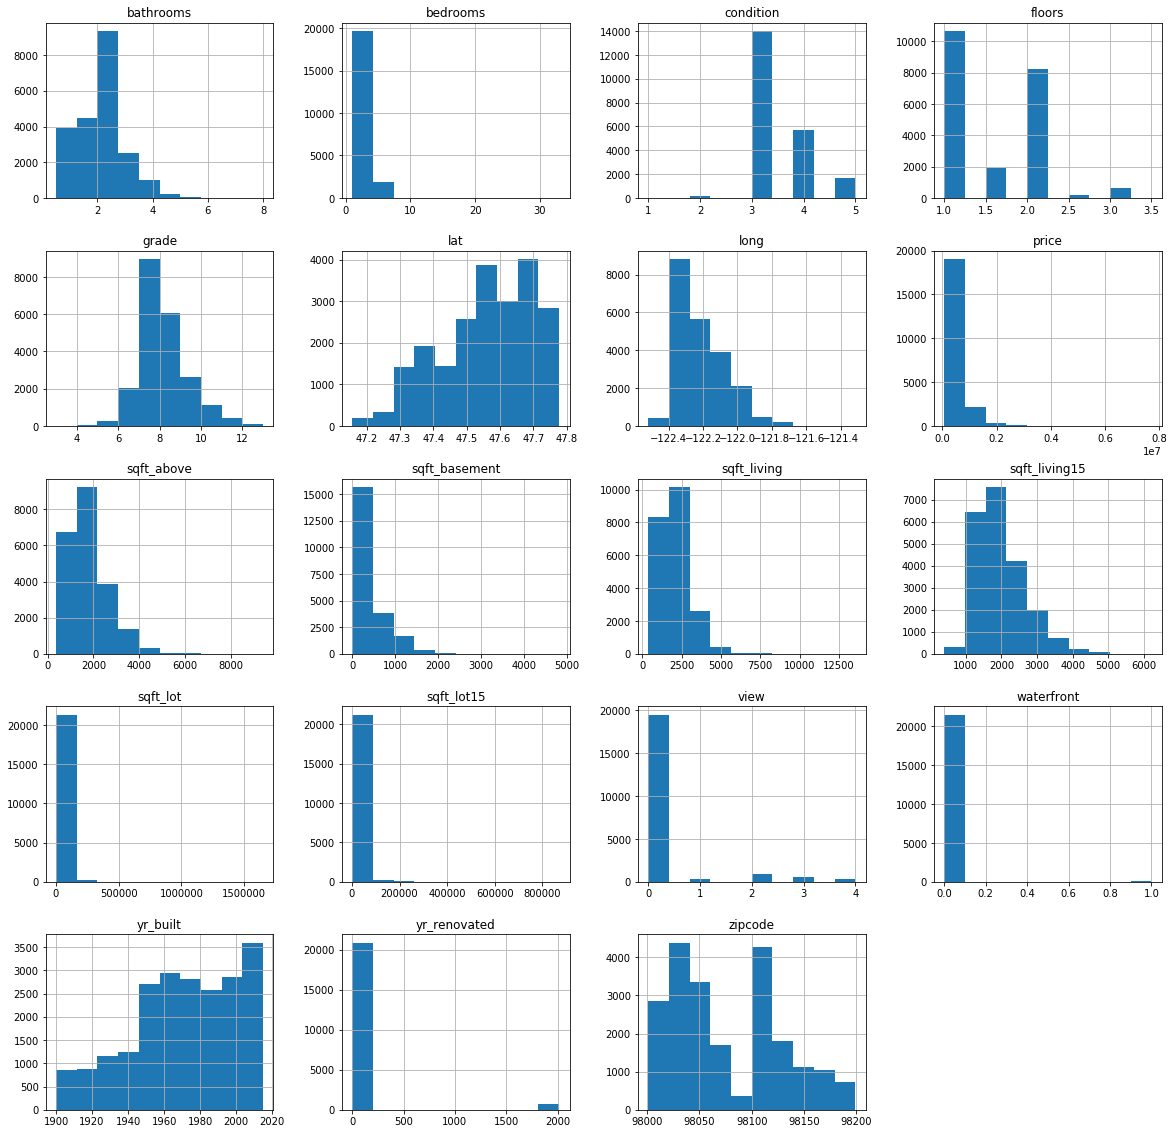

In [372]:
df.hist(figsize = [20,20]);

#### Numeric variables/features:
  - price
  - sqft_above
  - sqft_living
  - sqft_lot
  - sqft_living15
  - sqft_lot15
    
#### Categorical variables (planned actions and/or observations):
  - bedrooms  (binned:  1, 2, 3, 4, 5, 6+)
  - bathrooms  (binned:  <=1, <=2, <=3, <=4, >4; --OR-- <=1,1.25-1.75, 2-2.75, 3-3.75, 4-4.75, 5+)
  - condition  (binned by categories provided--1,2,3,4,5)
  - grade  (looks like a fairly normal distribution)
  - floors  (binned:  <=1, <=2, <=3, 3+)
  - view (5 view categories)
  - waterfront (1 or 0, yes/no, etc.)
  - yr_built (binned)
  - yr_renovated (binned)
  - sqft_basement  (binned)
  - zipcode (dummy variables??)
  - date (converted from string and binned by season?)

#### Variables I intend to leave out:
  - lat  
  - long



In [373]:
df['bedrooms'].value_counts()  # bins:  1,2,3,4,5, 6+

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [374]:
df['bathrooms'].value_counts().head(15)  # bins: <=1,1.25-1.75, 2-2.75, 3-3.75, 4-4.75, 5+

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
Name: bathrooms, dtype: int64

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(10), object(1)
memory usage: 3.3+ MB


#### Split dataframe into sub-dataframes based on numeric vs. categorical vs. left out of model (lat, long)

In [376]:
# df_price, df_num, df_cat, df_lat_long

df_price = pd.DataFrame(df.price, columns = ["price"])
df_price.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [377]:
# create numerical sub-dataframe:
#     price
#     sqft_above
#     sqft_living
#     sqft_lot
#     sqft_living15
#     sqft_lot15


df_num = df[['price', 'sqft_above', 'sqft_living', 'sqft_lot', 
             'sqft_living15', 'sqft_lot15']].copy()
df_num.head(10)


,price,sqft_above,sqft_living,sqft_lot,sqft_living15,sqft_lot15
0,221900.0,1180,1180,5650,1340,5650
1,538000.0,2170,2570,7242,1690,7639
2,180000.0,770,770,10000,2720,8062
3,604000.0,1050,1960,5000,1360,5000
4,510000.0,1680,1680,8080,1800,7503
5,1230000.0,3890,5420,101930,4760,101930
6,257500.0,1715,1715,6819,2238,6819
7,291850.0,1060,1060,9711,1650,9711
8,229500.0,1050,1780,7470,1780,8113
9,323000.0,1890,1890,6560,2390,7570


In [378]:
# Categorical variables (planned actions and/or observations):

#     bedrooms (binned: 1, 2, 3, 4, 5, 6+)
#     bathrooms (binned: <=1, <=2, <=3, <=4, >4; --OR-- <=1,1.25-1.75, 2-2.75, 3-3.75, 4-4.75, 5+)
#     condition (binned by categories provided--1,2,3,4,5)
#     grade (looks like a fairly normal distribution)
#     floors (binned: <=1, <=2, <=3, 3+)
#     view (5 view categories)
#     waterfront (1 or 0, yes/no, etc.)
#     yr_built (binned)
#     yr_renovated (binned)
#     zipcode (dummy variables??)
#     date (converted from string and binned by season?)

    
df_cat = df[['bedrooms', 'bathrooms', 'condition', 'grade', 'floors', 'view', 'waterfront', 'yr_built', 'yr_renovated', 'sqft_basement','zipcode', 'date']].copy()
df_cat.head()


,bedrooms,bathrooms,condition,grade,floors,view,waterfront,yr_built,yr_renovated,sqft_basement,zipcode,date
0,3,1.00,3,7,1.0,0.0,0.0,1955,0.0,0.0,98178,10/13/2014
1,3,2.25,3,7,2.0,0.0,0.0,1951,1991.0,400.0,98125,12/9/2014
2,2,1.00,3,6,1.0,0.0,0.0,1933,0.0,0.0,98028,2/25/2015
3,4,3.00,5,7,1.0,0.0,0.0,1965,0.0,910.0,98136,12/9/2014
4,3,2.00,3,8,1.0,0.0,0.0,1987,0.0,0.0,98074,2/18/2015


In [379]:
# moving lat & long into a separate df:

df_lat_long = df[['lat', 'long']].copy()
df_lat_long.head()


,lat,long
0,47.5112,-122.257
1,47.7210,-122.319
2,47.7379,-122.233
3,47.5208,-122.393
4,47.6168,-122.045


### Perform a log transformation on numerical variables:

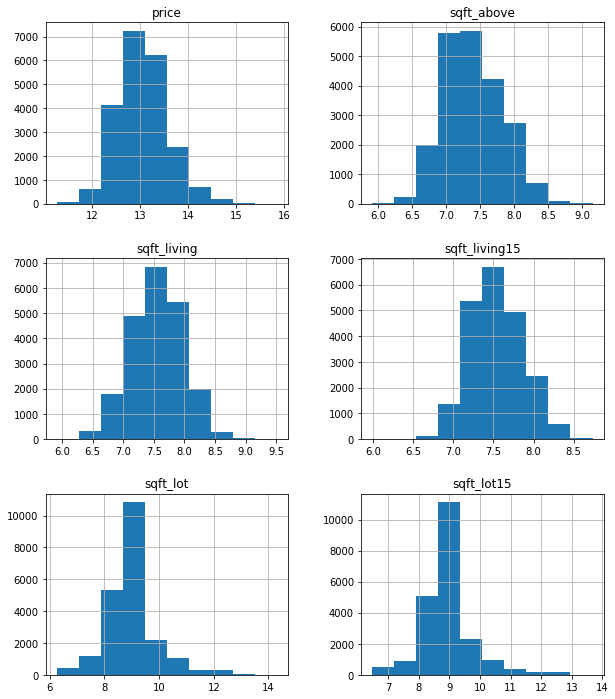

In [380]:
import numpy as np
df_num_log = pd.DataFrame([])       
df_num_log["price"] = np.log(df_num["price"])
df_num_log["sqft_above"] = np.log(df_num["sqft_above"])
df_num_log["sqft_living"] = np.log(df_num["sqft_living"])
df_num_log["sqft_lot"] = np.log(df_num["sqft_lot"])
df_num_log["sqft_living15"] = np.log(df_num["sqft_living15"])
df_num_log["sqft_lot15"] = np.log(df_num["sqft_lot15"])

df_num_log.hist(figsize = [10, 12]);


Log transformations on all of the variables shown in the histograms helps 
to normalize the distribution, so I will keep these transformations.

Not sure how I will handle sqft_basement yet.

#### Moving on to categorical variables...

Per message from Brandon on the Slack channel, it is not necessary to do transformations on 
categorical variables for this project.  If I had more time, I might explore how a log 
transformation, for example, might affect this data.  For now, I'm just going to bin 
or make dummy variables.

In [381]:
# From above, but adding sqft_basement:  
#     bedrooms (binned: 1, 2, 3, 4, 5, 6+)
#     bathrooms (binned: <=1, <=2, <=3, <=4, >4; --OR-- <=1,1.25-1.75, 2-2.75, 3-3.75, 4-4.75, 5+)
#     condition (binned by categories provided--1,2,3,4,5)
#     grade (looks like a fairly normal distribution)
#     floors (binned: <=1, <=2, <=3, 3+)
#     view (5 view categories)
#     waterfront (1 or 0, yes/no, etc.)
#     yr_built (binned)
#     yr_renovated (binned)
#     sqft_basement (binned)
#     zipcode (dummy variables??)
#     date (converted from string and binned by season?)


In [382]:
df_cat = df[['bedrooms', 'bathrooms', 'condition', 'grade', 'floors', 'view', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode', 'date', 'sqft_basement']].copy()
df_cat.head()

,bedrooms,bathrooms,condition,grade,floors,view,waterfront,yr_built,yr_renovated,zipcode,date,sqft_basement
0,3,1.00,3,7,1.0,0.0,0.0,1955,0.0,98178,10/13/2014,0.0
1,3,2.25,3,7,2.0,0.0,0.0,1951,1991.0,98125,12/9/2014,400.0
2,2,1.00,3,6,1.0,0.0,0.0,1933,0.0,98028,2/25/2015,0.0
3,4,3.00,5,7,1.0,0.0,0.0,1965,0.0,98136,12/9/2014,910.0
4,3,2.00,3,8,1.0,0.0,0.0,1987,0.0,98074,2/18/2015,0.0


In [383]:
# checking the most recent year for renovation in the data set for binning purposes

df.yr_renovated.max()

2015.0

In [384]:
# checking some values for sqft_basement in the data set for binning purposes

df.sqft_basement.value_counts()
df.sqft_basement.max()       # 4820 sq ft
df.sqft_basement.median()  # 0 sq ft
df.sqft_basement.mean()    # 285.7 sq ft

285.7165810066213

In [385]:
# creating bins for most categorical variables 
# (not sure what to do about zipcode and date, so leaving them for now)

bins = [1,2,3,4,5,34]  # note that the last bin is 6 or more bedrooms
bins_bedrooms = pd.cut(df_cat['bedrooms'], bins)
bins_bedrooms = bins_bedrooms.cat.as_unordered()

bins = [1,2,3,4,9]  # note that the bins go up to the value indicated, except for the last bin, which is 5+ bathrooms
bins_bathrooms = pd.cut(df_cat['bathrooms'], bins)
bins_bathrooms = bins_bathrooms.cat.as_unordered()

bins = [1,6,7,8,10,14]  
bins_grade = pd.cut(df_cat['grade'], bins)
bins_grade = bins_grade.cat.as_unordered()

bins = [1,2,3,4,6]
bins_condition = pd.cut(df_cat['condition'], bins)
bins_condition = bins_condition.cat.as_unordered()

bins = [1,2,3,4,10]  # note that the bin marked '4' is 4 or more floors
bins_floors = pd.cut(df_cat['floors'], bins)
bins_floors = bins_floors.cat.as_unordered()

bins = [1,2,3,4,5]
bins_view = pd.cut(df_cat['view'], bins)
bins_view = bins_view.cat.as_unordered()

bins = [0,1]
bins_waterfront = pd.cut(df_cat['waterfront'], bins)
bins_waterfront = bins_waterfront.cat.as_unordered()

bins = [1900,1929,1945,1969,1980,1990,2000,2010,2019]
bins_yr_built = pd.cut(df_cat['yr_built'], bins)
bins_yr_built = bins_yr_built.cat.as_unordered()

bins = [0, 1960, 1980, 2000, 2016]
bins_yr_renovated = pd.cut(df_cat['yr_renovated'], bins)
bins_yr_renovated = bins_yr_renovated.cat.as_unordered()

bins = [0, 300, 1000, 3000, 5000]
bins_sqft_basement = pd.cut(df_cat['sqft_basement'], bins)
bins_sqft_basement = bins_sqft_basement.cat.as_unordered()

bedrooms_dummy = pd.get_dummies(bins_bedrooms, prefix="bedrooms")
bathrooms_dummy = pd.get_dummies(bins_bathrooms, prefix="bathrooms")
grade_dummy = pd.get_dummies(bins_grade, prefix="grade")
condition_dummy = pd.get_dummies(bins_condition, prefix="condition")
floors_dummy = pd.get_dummies(bins_floors, prefix="floors")
view_dummy = pd.get_dummies(bins_view, prefix="view")
waterfront_dummy = pd.get_dummies(bins_waterfront, prefix="waterfront")
yr_built_dummy = pd.get_dummies(bins_yr_built, prefix="yr_built")
yr_renovated_dummy = pd.get_dummies(bins_yr_renovated, prefix = "yr_renovated")
sqft_basement_dummy = pd.get_dummies(bins_sqft_basement, prefix = 'sqft_basement')
df_cat1 = df_cat.drop(['bedrooms', 'bathrooms', 'grade', 'condition', 'floors', 'view', 'waterfront', 'yr_built', 'yr_renovated', 'sqft_basement'], axis=1)
df_cat1 = pd.concat([df_cat1, bedrooms_dummy, bathrooms_dummy, grade_dummy, condition_dummy, floors_dummy, view_dummy, waterfront_dummy, yr_built_dummy, yr_renovated_dummy, sqft_basement_dummy], axis=1)

df_cat1.head()

,zipcode,date,"bedrooms_(1, 2]","bedrooms_(2, 3]","bedrooms_(3, 4]","bedrooms_(4, 5]","bedrooms_(5, 34]","bathrooms_(1, 2]","bathrooms_(2, 3]","bathrooms_(3, 4]",...,"yr_built_(2000, 2010]","yr_built_(2010, 2019]","yr_renovated_(0, 1960]","yr_renovated_(1960, 1980]","yr_renovated_(1980, 2000]","yr_renovated_(2000, 2016]","sqft_basement_(0, 300]","sqft_basement_(300, 1000]","sqft_basement_(1000, 3000]","sqft_basement_(3000, 5000]"
0,98178,10/13/2014,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,98125,12/9/2014,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,98028,2/25/2015,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,98136,12/9/2014,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,98074,2/18/2015,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


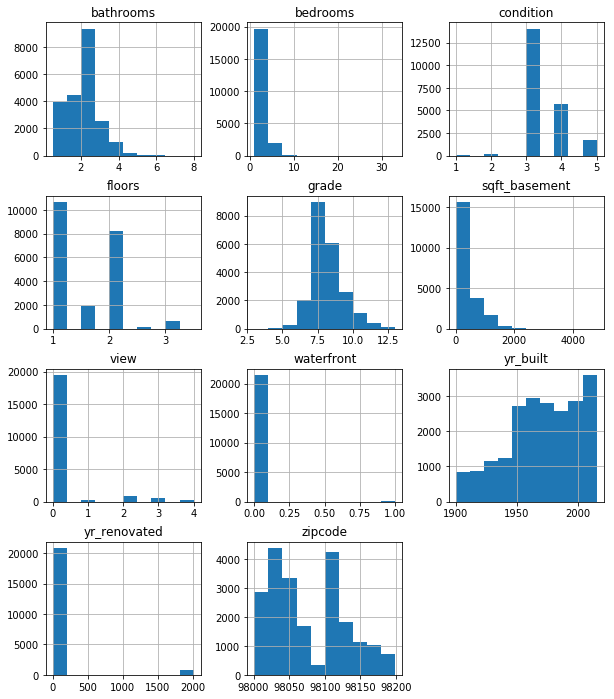

In [386]:
df_cat.hist(figsize = [10, 12]);

### Combining dataframes

Having done the transformations on the numerical and categorical variables, I'm going to combine these dataframes.  

First, I'll combine all three (numerical, categorical, lat-long) into a dataframe called **analytical_base_df.**

Second, because I don't want to include lat-long in the model, I'm going to created a dataframe without lat-long, which I'll call **df_num_cat.**

In [387]:
# this one has everything in it
analytical_base_df = pd.concat([df_num_log, df_cat1, df_lat_long], axis=1)
analytical_base_df.head(10) 

,price,sqft_above,sqft_living,sqft_lot,sqft_living15,sqft_lot15,zipcode,date,"bedrooms_(1, 2]","bedrooms_(2, 3]",...,"yr_renovated_(0, 1960]","yr_renovated_(1960, 1980]","yr_renovated_(1980, 2000]","yr_renovated_(2000, 2016]","sqft_basement_(0, 300]","sqft_basement_(300, 1000]","sqft_basement_(1000, 3000]","sqft_basement_(3000, 5000]",lat,long
0,12.309982,7.073270,7.073270,8.639411,7.200425,8.639411,98178,10/13/2014,0,1,...,0,0,0,0,0,0,0,0,47.5112,-122.257
1,13.195614,7.682482,7.851661,8.887653,7.432484,8.941022,98125,12/9/2014,0,1,...,0,0,1,0,0,1,0,0,47.7210,-122.319
2,12.100712,6.646391,6.646391,9.210340,7.908387,8.994917,98028,2/25/2015,1,0,...,0,0,0,0,0,0,0,0,47.7379,-122.233
3,13.311329,6.956545,7.580700,8.517193,7.215240,8.517193,98136,12/9/2014,0,0,...,0,0,0,0,0,1,0,0,47.5208,-122.393
4,13.142166,7.426549,7.426549,8.997147,7.495542,8.923058,98074,2/18/2015,0,1,...,0,0,0,0,0,0,0,0,47.6168,-122.045
5,14.022525,8.266164,8.597851,11.532042,8.468003,11.532042,98053,5/12/2014,0,0,...,0,0,0,0,0,0,1,0,47.6561,-122.005
6,12.458775,7.447168,7.447168,8.827468,7.713338,8.827468,98003,6/27/2014,0,1,...,0,0,0,0,0,0,0,0,47.3097,-122.327
7,12.583995,6.966024,6.966024,9.181015,7.408531,9.181015,98198,1/15/2015,0,1,...,0,0,0,0,0,0,0,0,47.4095,-122.315
8,12.343658,6.956545,7.484369,8.918650,7.484369,9.001223,98146,4/15/2015,0,1,...,0,0,0,0,0,1,0,0,47.5123,-122.337
9,12.685408,7.544332,7.544332,8.788746,7.779049,8.931948,98038,3/12/2015,0,1,...,0,0,0,0,0,0,0,0,47.3684,-122.031


In [388]:
# this one just contains the numerical and categorical variables

df_num_cat = pd.concat([df_num_log, df_cat1], axis=1)
df_num_cat.head()

,price,sqft_above,sqft_living,sqft_lot,sqft_living15,sqft_lot15,zipcode,date,"bedrooms_(1, 2]","bedrooms_(2, 3]",...,"yr_built_(2000, 2010]","yr_built_(2010, 2019]","yr_renovated_(0, 1960]","yr_renovated_(1960, 1980]","yr_renovated_(1980, 2000]","yr_renovated_(2000, 2016]","sqft_basement_(0, 300]","sqft_basement_(300, 1000]","sqft_basement_(1000, 3000]","sqft_basement_(3000, 5000]"
0,12.309982,7.073270,7.073270,8.639411,7.200425,8.639411,98178,10/13/2014,0,1,...,0,0,0,0,0,0,0,0,0,0
1,13.195614,7.682482,7.851661,8.887653,7.432484,8.941022,98125,12/9/2014,0,1,...,0,0,0,0,1,0,0,1,0,0
2,12.100712,6.646391,6.646391,9.210340,7.908387,8.994917,98028,2/25/2015,1,0,...,0,0,0,0,0,0,0,0,0,0
3,13.311329,6.956545,7.580700,8.517193,7.215240,8.517193,98136,12/9/2014,0,0,...,0,0,0,0,0,0,0,1,0,0
4,13.142166,7.426549,7.426549,8.997147,7.495542,8.923058,98074,2/18/2015,0,1,...,0,0,0,0,0,0,0,0,0,0


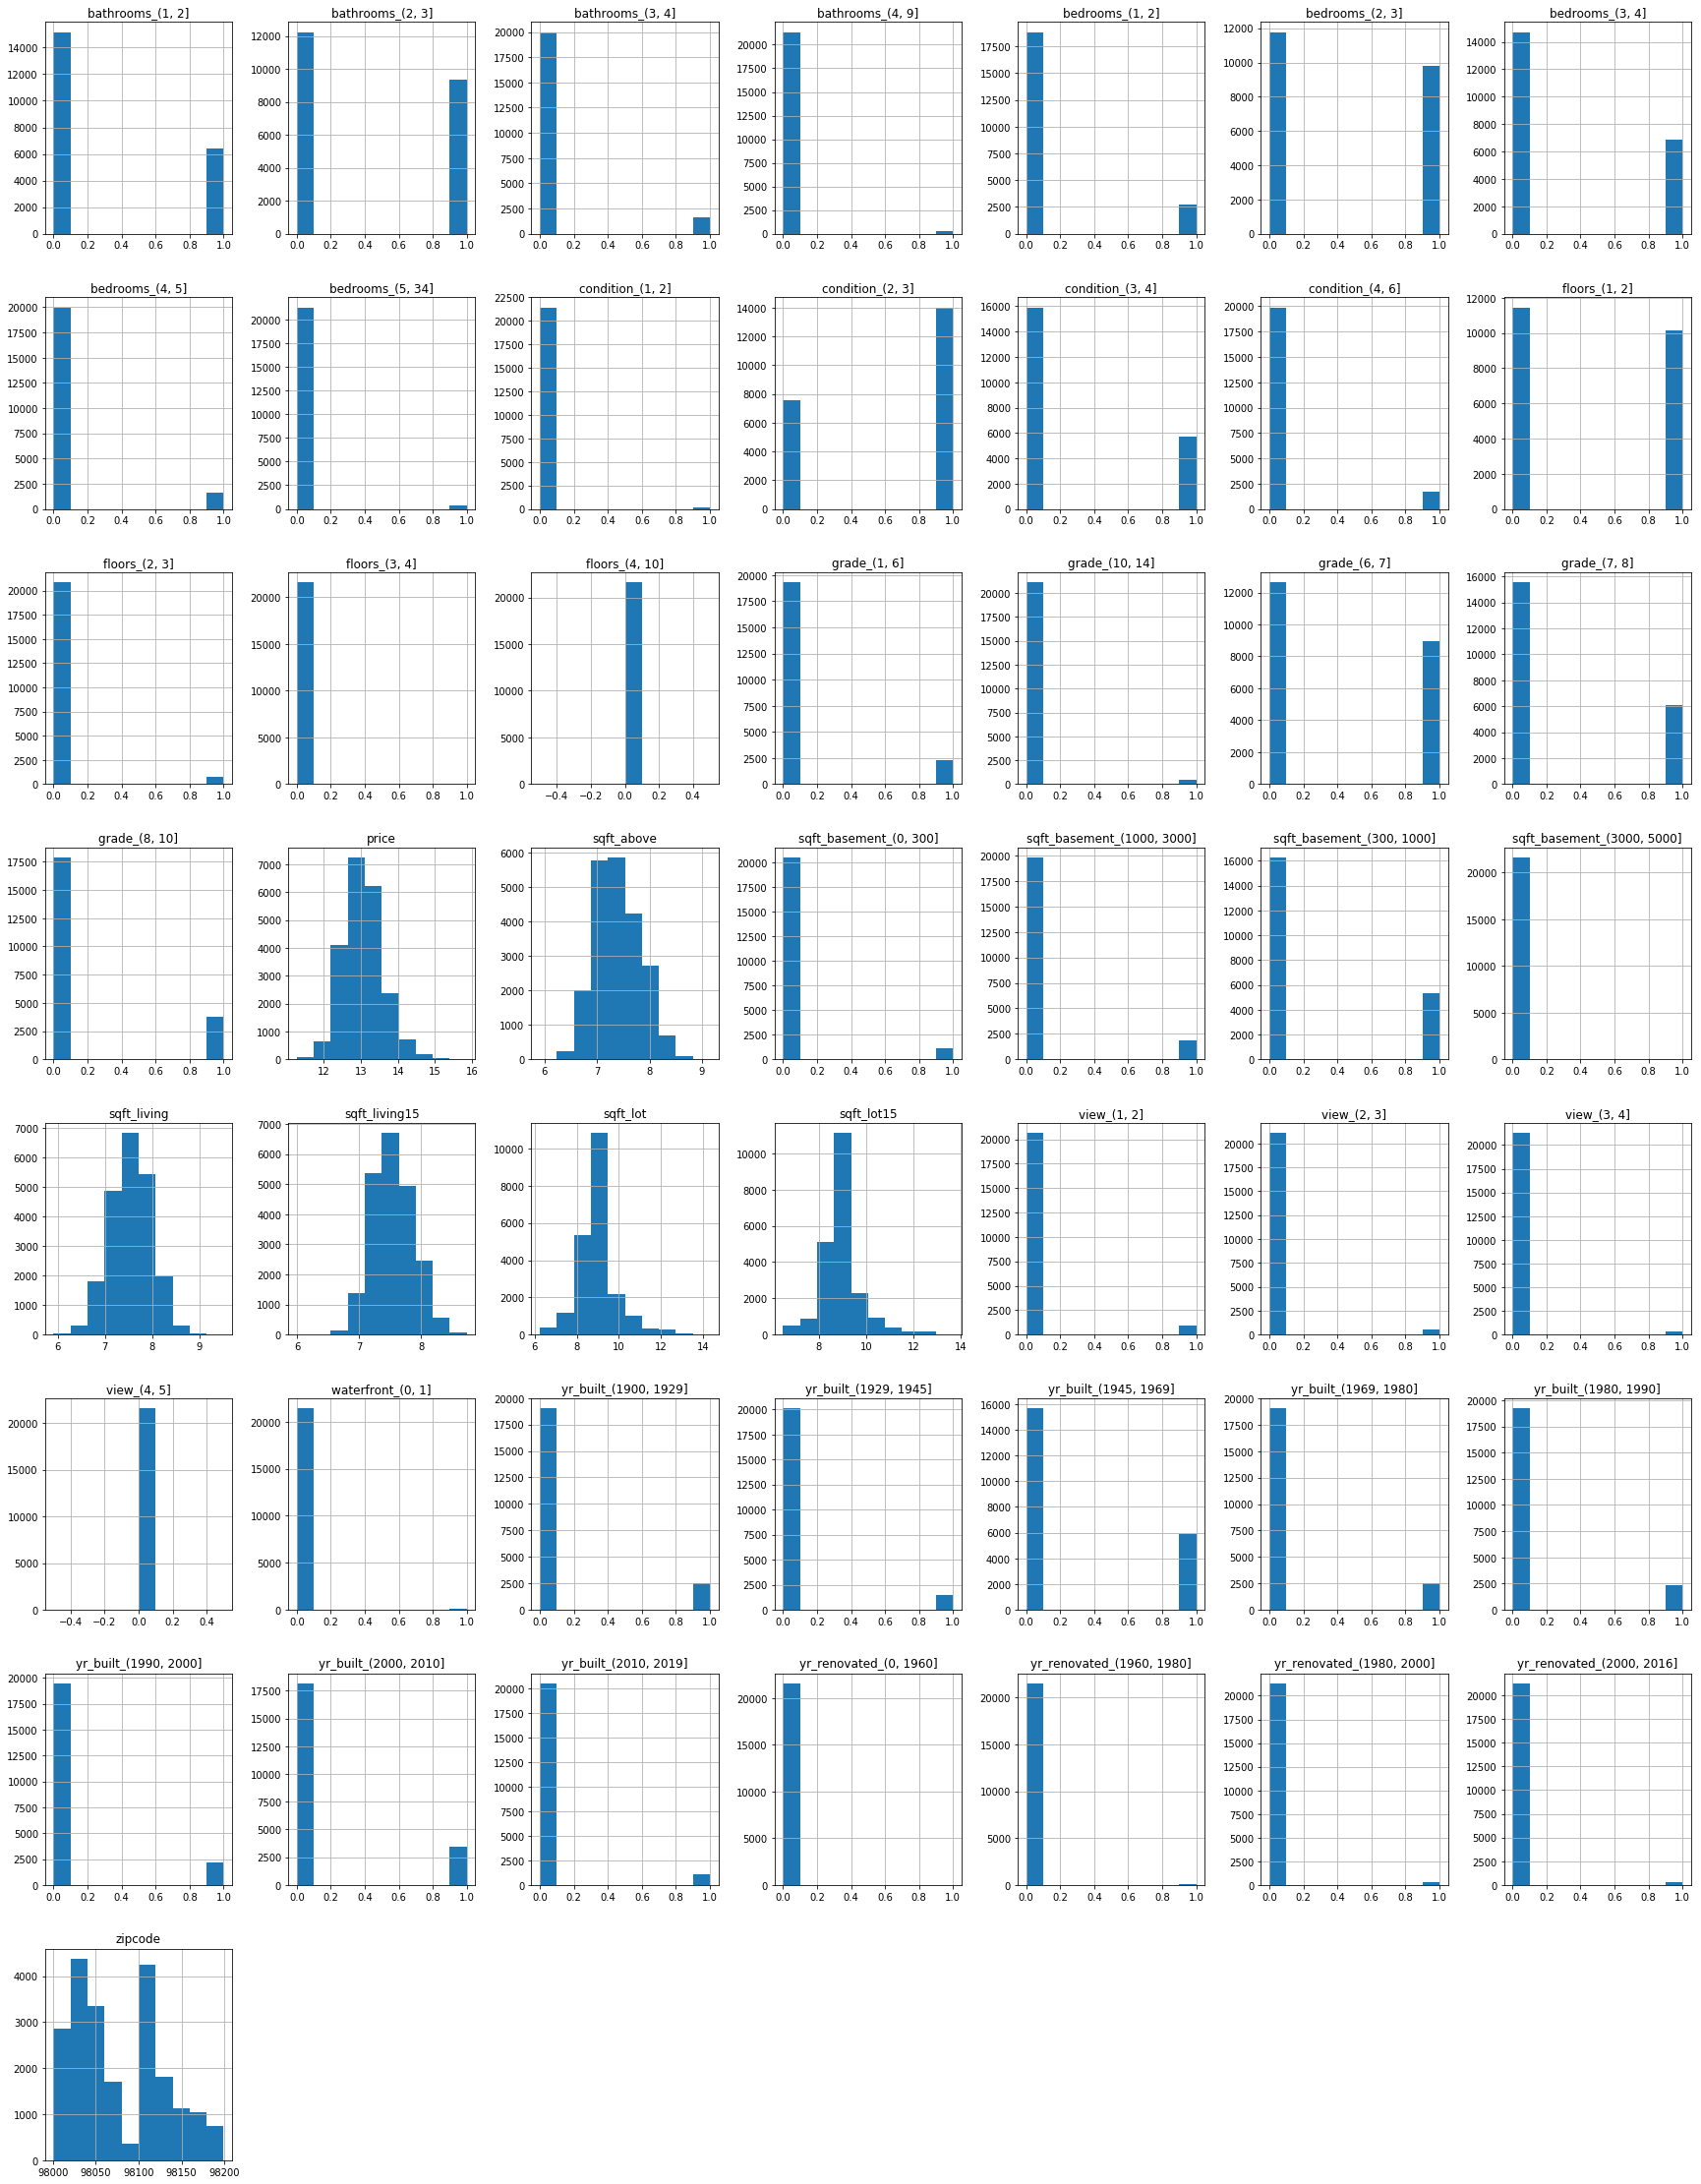

In [389]:
df_num_cat.hist(figsize = [30, 40]);

In [390]:
df_num_cat.describe()

,price,sqft_above,sqft_living,sqft_lot,sqft_living15,sqft_lot15,zipcode,"bedrooms_(1, 2]","bedrooms_(2, 3]","bedrooms_(3, 4]",...,"yr_built_(2000, 2010]","yr_built_(2010, 2019]","yr_renovated_(0, 1960]","yr_renovated_(1960, 1980]","yr_renovated_(1980, 2000]","yr_renovated_(2000, 2016]","sqft_basement_(0, 300]","sqft_basement_(300, 1000]","sqft_basement_(1000, 3000]","sqft_basement_(3000, 5000]"
count,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,13.048211,7.395148,7.550720,8.989805,7.539494,8.960758,98077.951845,0.127796,0.454878,0.318655,...,0.159281,0.050840,0.001296,0.003612,0.013335,0.016206,0.052461,0.248090,0.084317,0.000232
std,0.526555,0.427140,0.424191,0.902078,0.327467,0.812613,53.513072,0.333870,0.497971,0.465966,...,0.365947,0.219677,0.035984,0.059989,0.114708,0.126270,0.222960,0.431914,0.277869,0.015214
min,11.264464,5.913503,5.913503,6.253829,5.988961,6.478510,98001.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.682307,7.081709,7.265430,8.525161,7.306531,8.536996,98033.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.017003,7.352441,7.554859,8.938269,7.517521,8.938532,98065.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.377006,7.700748,7.843849,9.276596,7.766417,9.218606,98118.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,15.856731,9.149528,9.513404,14.317109,8.733916,13.677627,98199.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [391]:
df_num_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 51 columns):
price                         21597 non-null float64
sqft_above                    21597 non-null float64
sqft_living                   21597 non-null float64
sqft_lot                      21597 non-null float64
sqft_living15                 21597 non-null float64
sqft_lot15                    21597 non-null float64
zipcode                       21597 non-null int64
date                          21597 non-null object
bedrooms_(1, 2]               21597 non-null uint8
bedrooms_(2, 3]               21597 non-null uint8
bedrooms_(3, 4]               21597 non-null uint8
bedrooms_(4, 5]               21597 non-null uint8
bedrooms_(5, 34]              21597 non-null uint8
bathrooms_(1, 2]              21597 non-null uint8
bathrooms_(2, 3]              21597 non-null uint8
bathrooms_(3, 4]              21597 non-null uint8
bathrooms_(4, 9]              21597 non-null uint8
grade_(1, 6

#### From the solution set for "Modeling our Data" in Section 12:
  "Remember that all the columns from store_1 onwards are actually dummies, so categorical variables. Because we stored the data and loaded it in again, this information was lost. Let's make sure they become categorical again. You can write a forloop to do this."

In [392]:
# Referencing the code logic from the solution set:
# for cat_names in walmart.iloc[:,7:].columns:
#     walmart[cat_names] = walmart[cat_names].astype('category')

In [393]:
for cat_names in df_num_cat.iloc[:,8:].columns:
    df_num_cat[cat_names] = df_num_cat[cat_names].astype('category')

In [394]:
# checking to make sure it works:

df_num_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 51 columns):
price                         21597 non-null float64
sqft_above                    21597 non-null float64
sqft_living                   21597 non-null float64
sqft_lot                      21597 non-null float64
sqft_living15                 21597 non-null float64
sqft_lot15                    21597 non-null float64
zipcode                       21597 non-null int64
date                          21597 non-null object
bedrooms_(1, 2]               21597 non-null category
bedrooms_(2, 3]               21597 non-null category
bedrooms_(3, 4]               21597 non-null category
bedrooms_(4, 5]               21597 non-null category
bedrooms_(5, 34]              21597 non-null category
bathrooms_(1, 2]              21597 non-null category
bathrooms_(2, 3]              21597 non-null category
bathrooms_(3, 4]              21597 non-null category
bathrooms_(4, 9]              21597 no

All of the dummy variables are showing up as "category", as they should.

(Note that I still have a problem with the date and zipcode variables.  Haven't figured out what to do with them yet.)

In [395]:
# checking to see that only continuous variables are showing up in the statistics

df_num_cat.describe()

,price,sqft_above,sqft_living,sqft_lot,sqft_living15,sqft_lot15,zipcode
count,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,13.048211,7.395148,7.550720,8.989805,7.539494,8.960758,98077.951845
std,0.526555,0.427140,0.424191,0.902078,0.327467,0.812613,53.513072
min,11.264464,5.913503,5.913503,6.253829,5.988961,6.478510,98001.000000
25%,12.682307,7.081709,7.265430,8.525161,7.306531,8.536996,98033.000000
50%,13.017003,7.352441,7.554859,8.938269,7.517521,8.938532,98065.000000
75%,13.377006,7.700748,7.843849,9.276596,7.766417,9.218606,98118.000000
max,15.856731,9.149528,9.513404,14.317109,8.733916,13.677627,98199.000000


In [396]:
# import libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

### Adapted from Section 12 Modeling our Data Solution Set example:  
Looking at continuous variables...

In [397]:
df_num_cat.describe().columns.drop(['price'])
col_names = df_num_cat.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("King County Home Values: price~" + val)
    print ("--------------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df_num_cat).fit()
    X_new = pd.DataFrame({val: [df_num_cat[val].min(), df_num_cat[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

King County Home Values: price~sqft_above
--------------------------------------
['sqft_above', 0.3434109763900405, 7.705927481040629, 0.7224038639921503, 0.0]
King County Home Values: price~sqft_living
--------------------------------------
['sqft_living', 0.45535727584899854, 6.723412788489345, 0.8376416805516571, 0.0]
King County Home Values: price~sqft_lot
--------------------------------------
['sqft_lot', 0.01911602756307318, 12.32269218571702, 0.0807046181297909, 1.2147387791307053e-92]
King County Home Values: price~sqft_living15
--------------------------------------
['sqft_living15', 0.3686357627771213, 5.687551498517107, 0.97628031035234, 0.0]
King County Home Values: price~sqft_lot15
--------------------------------------
['sqft_lot15', 0.015304239791891994, 12.329902958068974, 0.08016151879460454, 2.090004863689243e-74]
King County Home Values: price~zipcode
--------------------------------------
['zipcode', 0.0015044846645606569, 50.480723938083486, -0.0003816608349984026

In [398]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,sqft_above,0.343411,7.70593,0.722404,0
2,sqft_living,0.455357,6.72341,0.837642,0
3,sqft_lot,0.019116,12.3227,0.0807046,1.21474e-92
4,sqft_living15,0.368636,5.68755,0.97628,0
5,sqft_lot15,0.0153042,12.3299,0.0801615,2.09e-74
6,zipcode,0.00150448,50.4807,-0.000381661,1.18394e-08


#### Because I didn't have time to figure out how to properly transform zipcode into a categorical variable (there are 70 unique values), and because the R2 for zip is obviously low as it is, I'm going to drop zipcode and see how the results change:

In [401]:
df_num_cat.describe().columns.drop(['price', 'zipcode'])
col_names = df_num_cat.describe().columns.drop(['price', 'zipcode'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("King County Home Values: price~" + val)
    print ("--------------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df_num_cat).fit()
    X_new = pd.DataFrame({val: [df_num_cat[val].min(), df_num_cat[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

King County Home Values: price~sqft_above
--------------------------------------
['sqft_above', 0.3434109763900405, 7.705927481040629, 0.7224038639921503, 0.0]
King County Home Values: price~sqft_living
--------------------------------------
['sqft_living', 0.45535727584899854, 6.723412788489345, 0.8376416805516571, 0.0]
King County Home Values: price~sqft_lot
--------------------------------------
['sqft_lot', 0.01911602756307318, 12.32269218571702, 0.0807046181297909, 1.2147387791307053e-92]
King County Home Values: price~sqft_living15
--------------------------------------
['sqft_living15', 0.3686357627771213, 5.687551498517107, 0.97628031035234, 0.0]
King County Home Values: price~sqft_lot15
--------------------------------------
['sqft_lot15', 0.015304239791891994, 12.329902958068974, 0.08016151879460454, 2.090004863689243e-74]


In [400]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,sqft_above,0.343411,7.70593,0.722404,0
2,sqft_living,0.455357,6.72341,0.837642,0
3,sqft_lot,0.019116,12.3227,0.0807046,1.21474e-92
4,sqft_living15,0.368636,5.68755,0.97628,0
5,sqft_lot15,0.0153042,12.3299,0.0801615,2.09e-74


#### Dropping sqft_lot and sqft_lot15, as their R2 values are very low:

In [402]:
df_num_cat.describe().columns.drop(['price', 'zipcode', 'sqft_lot', 'sqft_lot15'])
col_names = df_num_cat.describe().columns.drop(['price', 'zipcode', 'sqft_lot', 'sqft_lot15'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("King County Home Values: price~" + val)
    print ("--------------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df_num_cat).fit()
    X_new = pd.DataFrame({val: [df_num_cat[val].min(), df_num_cat[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

King County Home Values: price~sqft_above
--------------------------------------
['sqft_above', 0.3434109763900405, 7.705927481040629, 0.7224038639921503, 0.0]
King County Home Values: price~sqft_living
--------------------------------------
['sqft_living', 0.45535727584899854, 6.723412788489345, 0.8376416805516571, 0.0]
King County Home Values: price~sqft_living15
--------------------------------------
['sqft_living15', 0.3686357627771213, 5.687551498517107, 0.97628031035234, 0.0]


In [403]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,sqft_above,0.343411,7.70593,0.722404,0
2,sqft_living,0.455357,6.72341,0.837642,0
3,sqft_living15,0.368636,5.68755,0.97628,0


So, of the group of continuous variables that were in the model, the highest R2 values are associated with the square footage of the actual living space in the house and of the 15 closest neighbors.  

Making sure that the categorical variables are still categorical:

In [404]:
df_num_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 51 columns):
price                         21597 non-null float64
sqft_above                    21597 non-null float64
sqft_living                   21597 non-null float64
sqft_lot                      21597 non-null float64
sqft_living15                 21597 non-null float64
sqft_lot15                    21597 non-null float64
zipcode                       21597 non-null int64
date                          21597 non-null object
bedrooms_(1, 2]               21597 non-null category
bedrooms_(2, 3]               21597 non-null category
bedrooms_(3, 4]               21597 non-null category
bedrooms_(4, 5]               21597 non-null category
bedrooms_(5, 34]              21597 non-null category
bathrooms_(1, 2]              21597 non-null category
bathrooms_(2, 3]              21597 non-null category
bathrooms_(3, 4]              21597 non-null category
bathrooms_(4, 9]              21597 no

#### If the categorical variables are not showing up as type category for some reason, unhash the code below and run it.


In [405]:
# for cat_names in df_num_cat.iloc[:,8:].columns:
#     df_num_cat[cat_names] = df_num_cat[cat_names].astype('category')

### Looking now at categorical variables, again using the example from Section 12, "Modeling our Data" lab:

In [408]:
cols_bedrooms= df_num_cat.columns[8:12]
cols_bathrooms= df_num_cat.columns[13:16]
cols_grade= df_num_cat.columns[17:21]
cols_condition= df_num_cat.columns[22:25]
cols_floors= df_num_cat.columns[26:29]
cols_view= df_num_cat.columns[33:33]
cols_waterfront= df_num_cat.columns[34:34]
cols_yr_built = df_num_cat.columns[35:42]
cols_yr_renovated = df_num_cat.columns[43:46]
cols_sqft_basement = df_num_cat.columns[47:50]

cols = [cols_bedrooms, cols_bathrooms, cols_grade, cols_condition, cols_floors, 
         cols_view, cols_waterfront, cols_yr_built, cols_yr_renovated, cols_sqft_basement]

# to make sure that the categorical variables are still coded as type 'category'
for cat_names in df_num_cat.iloc[:,8:].columns:
    df_num_cat[cat_names] = df_num_cat[cat_names].astype('category')
    
for col in cols:
    sum_cols = "+".join(col)
    form = "price ~" + sum_cols
    model = smf.ols(formula= form, data= df_num_cat).fit()
    print(model.summary())

SyntaxError: invalid syntax (<unknown>, line 1)

Trying another way...

In [407]:
col_names = df_num_cat.describe().columns.drop(['price'])
col_names

for col in col_names:
    sum_cols = "+".join(col)
    form = "price~" + sum_cols
    model = smf.ols(formula = form, data = df_num_cat).fit()
    print(model.summary())

PatsyError: Error evaluating factor: NameError: name 't' is not defined
    price~s+q+f+t+_+a+b+o+v+e
                ^

### Can't get the OLS in Statsmodels to work on these categorical variables.  

# Next steps:

I have made considerable progress in my understanding since 24 hours ago, but obviously, I still have more work to do.  

**First,** I need to figure out how to get a model to run with the categorical variables.  
  -  One thing that I have not yet been able to do is run the model in scipy.  That was something that Brandon mentioned in the Slack channel, and so I will be trying that next.
  -  There were some messages in the Slack channel for how to deal with the errors that I got above trying to run the categorical variables through an OLS model in statsmodels (patsy error), but I couldn't figure out how to make the string formatting to convert the column value into a Q("{val}") formatted variable.  I don't know for sure if that would help, but the system doesn't like something in the formatting of the variable, or in my code. 

**Second,** once I can get the model to work for categorical variables, I can evaluate the statistics resulting from that modeling and do more exploration of the data, and see if I need to do additional scaling or transformations.

**Third,** I will work on the train_test_split process.  A few comments:
  -  I am less clear about how this step will go, considering that we did the data cleaning and the initial data exploration and OLS models on the whole data set.  
  -  In practice, I'm thinking that OLS will not always be the best method to use, but it is a relatively simple initial modeling step to understand the relationships among different variables.   
  
**Fourth,** once I've compoleted the training and testing portion of the process, I will create visualizations to highlight the key findings.

**Fifth,** I will finalize the non-technical presentation, geared towards homeowners looking to maximize the amount they can receive when selling their homes.  

**Finally,** I will complete the blog post highlighting some aspect of the analysis, the insights I gained, and how this could help my peers studying data science!  